In [43]:
import json
import os
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [8]:
QA_TEMPLATE_GRID_SEARCH_NAME = (
    "qa_experiments/finetune/exp"
    "-gradsteps{gradient_accumulation_steps}"
    "-lr{learning_rate}"
    "-wd{weight_decay}"
    "-gradnorm{max_grad_norm}"
    "-warmup{warmup_ratio}/checkpoints")

In [7]:
def generate_configurations_for_grid_search():
    for gradient_accumulation_steps in [1, 2]:
        for learning_rate in [1e-5, 1e-4, 5e-6]:
            for weight_decay in [0.01, 0.1]:
                for max_grad_norm in [1, 5]:
                    for warmup_ratio in [0.0, 0.1]:
                        yield dict(gradient_accumulation_steps=gradient_accumulation_steps,
                                   learning_rate=learning_rate,
                                   weight_decay=weight_decay,
                                   max_grad_norm=max_grad_norm,
                                   warmup_ratio=warmup_ratio)

In [22]:
def grid_search():
    return [(QA_TEMPLATE_GRID_SEARCH_NAME.format(**cfg), cfg) for cfg in generate_configurations_for_grid_search()]

In [17]:
test = os.path.join(files[0], "checkpoint-7000", "trainer_state.json")
print(test)
with open(test, "r") as f:
    js = json.load(f)

qa_experiments/finetune/exp-gradsteps1-lr1e-05-wd0.01-gradnorm1-warmup0.0/checkpoints/checkpoint-7000/trainer_state.json


In [29]:
#[js["log_history"][x]["epoch"] for x in range(len(js["log_history"]))]
js["log_history"]

[{'epoch': 0.14,
  'learning_rate': 9.729875742841708e-06,
  'loss': 2.5292,
  'step': 500},
 {'epoch': 0.14,
  'eval_loss': 2.4133763313293457,
  'eval_runtime': 122.6428,
  'eval_samples_per_second': 41.07,
  'eval_steps_per_second': 5.137,
  'step': 500},
 {'epoch': 0.27,
  'learning_rate': 9.459751485683415e-06,
  'loss': 2.282,
  'step': 1000},
 {'epoch': 0.27,
  'eval_loss': 2.132891893386841,
  'eval_runtime': 122.2606,
  'eval_samples_per_second': 41.199,
  'eval_steps_per_second': 5.153,
  'step': 1000},
 {'epoch': 0.41,
  'learning_rate': 9.189627228525122e-06,
  'loss': 2.2179,
  'step': 1500},
 {'epoch': 0.41,
  'eval_loss': 2.09236216545105,
  'eval_runtime': 122.3026,
  'eval_samples_per_second': 41.185,
  'eval_steps_per_second': 5.151,
  'step': 1500},
 {'epoch': 0.54,
  'learning_rate': 8.919502971366829e-06,
  'loss': 2.1707,
  'step': 2000},
 {'epoch': 0.54,
  'eval_loss': 2.068479299545288,
  'eval_runtime': 122.4399,
  'eval_samples_per_second': 41.139,
  'eval_ste

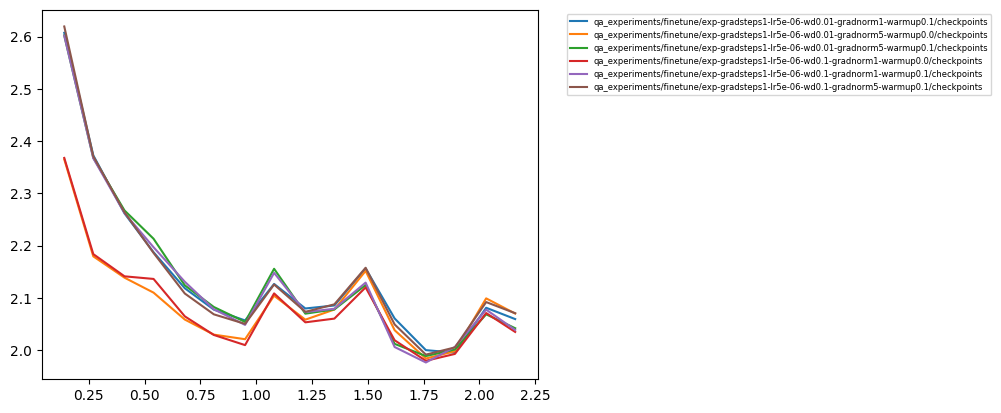

In [71]:
runs = {}
for file, experiment in grid_search():
    #print(experiment)
    if experiment["gradient_accumulation_steps"] == 2:
        continue
    if experiment["learning_rate"] == 1e-4:
        continue
    #if experiment["weight_decay"] != 0.01:
    #    continue
    #if experiment["max_grad_norm"] == 1:
    #    continue
    #if experiment["warmup_ratio"] == 0.0:
    #    continue
    if experiment["learning_rate"] == 1e-5:
        continue
    
    fname = os.path.join(file, "checkpoint-8000", "trainer_state.json")
    if not os.path.exists(fname):
        continue
    with open(fname) as train_f:
        train_js = json.load(train_f)

    epoch = []
    eval_loss = []
    
    for log in train_js["log_history"]:
        if "eval_loss" not in log:
            continue
    
        epoch.append(log["epoch"])
        eval_loss.append(log["eval_loss"])

    plt.plot(epoch, eval_loss, label=file)
    runs[file] = (epoch, eval_loss)

 
 
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', prop={"size": 6})

plt.show()
   

In [73]:
runs

{'qa_experiments/finetune/exp-gradsteps1-lr5e-06-wd0.01-gradnorm1-warmup0.1/checkpoints': ([0.14,
   0.27,
   0.41,
   0.54,
   0.68,
   0.81,
   0.95,
   1.08,
   1.22,
   1.35,
   1.49,
   1.62,
   1.76,
   1.89,
   2.03,
   2.16],
  [2.6071507930755615,
   2.372605562210083,
   2.261505365371704,
   2.1872401237487793,
   2.1183314323425293,
   2.0774521827697754,
   2.0567269325256348,
   2.1265411376953125,
   2.0796241760253906,
   2.0853235721588135,
   2.1563053131103516,
   2.0605177879333496,
   1.9998970031738281,
   1.9950706958770752,
   2.0809743404388428,
   2.059335470199585]),
 'qa_experiments/finetune/exp-gradsteps1-lr5e-06-wd0.01-gradnorm5-warmup0.0/checkpoints': ([0.14,
   0.27,
   0.41,
   0.54,
   0.68,
   0.81,
   0.95,
   1.08,
   1.22,
   1.35,
   1.49,
   1.62,
   1.76,
   1.89,
   2.03,
   2.16],
  [2.364992141723633,
   2.1793553829193115,
   2.138516664505005,
   2.109928607940674,
   2.05844783782959,
   2.0295684337615967,
   2.020820379257202,
   2.10402

In [75]:
with open("deleted_runs.json", "w") as f:
    json.dump(runs, f)